In [162]:
# Import and select county-level data for analysis with cannabis businesses from the Association of Minnesota Counties.
# Specifically, we would like to compare the growth of cannabis businesses against population, economic, and social indicators.
# Removed asterisks and notes from worksheets.
# Renamed 

#From worksheet: Demographics
#2020 Population
#2020 Households
#Below Poverty Line: All Ages (2020) (Estimate)
#Percent Below Poverty Line: All Ages (2020) (Estimate)

#From worksheet: Taxes_State Aids:
#Total Tax (2020)
#Number of Businesses (2020)

#From worksheet: Public Safety
#Total Serious Crimes (2021)
#Drug Abuse Arrests: Marijuana (2020)
#Drug Abuse Arrests: Total (2020)

import pandas as pd
import numpy as py

# Load the data sheet from the Association of Minnesota Counties from multiple worksheets.
df1=pd.read_excel('Minnesota DataPile October 2022.xlsx', sheet_name='Demographics', usecols=['County', '2020 Population', '2020 Households', 'Percent Below Poverty Line: All Ages (2020 Estimate)'])
df2=pd.read_excel('Minnesota DataPile October 2022.xlsx', sheet_name='Taxes_State Aids', usecols=['County', 'Total Tax (2020)', 'Number of Businesses (2020)'])
df3=pd.read_excel('Minnesota DataPile October 2022.xlsx', sheet_name='Public Safety', usecols=['County', 'Total serious crimes (2021)', 'Drug Abuse Arrests: Marijuana (2020)', 'Drug Abuse Arrests: Total (2020)'])

# Merge df1 and df2
merged_df = pd.merge(df1, df2, on='County', how='outer')

# Merge the result with df3
county_df = pd.merge(merged_df, df3, on='County', how='outer')

print(county_df)



               County  2020 Population  2020 Households  \
0              Aitkin            15697             7199   
1               Anoka           363887           133879   
2              Becker            35183            14371   
3            Beltrami            46228            17678   
4              Benton            41379            16479   
5           Big Stone             5166             2224   
6          Blue Earth            69112            27193   
7               Brown            25912            10970   
8             Carlton            36207            13789   
9              Carver           106922            38863   
10               Cass            30066            12614   
11           Chippewa            12598             5150   
12            Chisago            56621            20900   
13               Clay            65318            24931   
14         Clearwater             8524             3487   
15               Cook             5600             2711 

In [163]:
#Check counties
pd.set_option('display.max_rows', None)  # Show all rows
print(county_df['County'])

0                Aitkin
1                 Anoka
2                Becker
3              Beltrami
4                Benton
5             Big Stone
6            Blue Earth
7                 Brown
8               Carlton
9                Carver
10                 Cass
11             Chippewa
12              Chisago
13                 Clay
14           Clearwater
15                 Cook
16           Cottonwood
17            Crow Wing
18               Dakota
19                Dodge
20              Douglas
21            Faribault
22             Fillmore
23             Freeborn
24              Goodhue
25                Grant
26             Hennepin
27              Houston
28              Hubbard
29               Isanti
30               Itasca
31              Jackson
32              Kanabec
33            Kandiyohi
34              Kittson
35          Koochiching
36        Lac qui Parle
37                 Lake
38    Lake of the Woods
39             Le Sueur
40              Lincoln
41              

In [164]:
county_df.head()

,County,2020 Population,2020 Households,Percent Below Poverty Line: All Ages (2020 Estimate),Total Tax (2020),Number of Businesses (2020),Total serious crimes (2021),Drug Abuse Arrests: Marijuana (2020),Drug Abuse Arrests: Total (2020)
0,Aitkin,15697,7199,0.121807,9470509,481,242.0,26,86
1,Anoka,363887,133879,0.055704,267942597,7297,6642.0,162,543
2,Becker,35183,14371,0.101981,27972843,967,451.0,17,53
3,Beltrami,46228,17678,0.176668,45388132,1169,1659.0,33,165
4,Benton,41379,16479,0.081128,35083441,924,510.0,18,33


In [165]:
df4=pd.read_csv('agg_regbus.csv')

# Merge the result with 
countycann_df = pd.merge(county_df, df4, on='County', how='outer')



In [166]:
countycann_df.head()

,County,2020 Population,2020 Households,Percent Below Poverty Line: All Ages (2020 Estimate),Total Tax (2020),Number of Businesses (2020),Total serious crimes (2021),Drug Abuse Arrests: Marijuana (2020),Drug Abuse Arrests: Total (2020),Business Name
0,Aitkin,15697.0,7199.0,0.121807,9470509.0,481.0,242.0,26.0,86.0,20.0
1,Anoka,363887.0,133879.0,0.055704,267942597.0,7297.0,6642.0,162.0,543.0,223.0
2,Becker,35183.0,14371.0,0.101981,27972843.0,967.0,451.0,17.0,53.0,34.0
3,Beltrami,46228.0,17678.0,0.176668,45388132.0,1169.0,1659.0,33.0,165.0,39.0
4,Benton,41379.0,16479.0,0.081128,35083441.0,924.0,510.0,18.0,33.0,25.0


In [167]:
countycann_df.rename(columns={'2020 Population': 'Population', '2020 Households': 'Households', 'Percent Below Poverty Line: All Ages (2020 Estimate)': 'Poverty_Perc', 
                              'Total Tax (2020)': 'Sales_Tax', 'Number of Businesses (2020)': 'Businesses', 
                              'Total serious crimes (2021)': 'Total_crimes', 'Drug Abuse Arrests: Marijuana (2020)': 'Marijuana_DrugArrests', 
                              'Drug Abuse Arrests: Total (2020)': 'Total_DrugArrests', 'Business Name': 'Total_CannBus'}, inplace=True)

countycann_df.head()

,County,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus
0,Aitkin,15697.0,7199.0,0.121807,9470509.0,481.0,242.0,26.0,86.0,20.0
1,Anoka,363887.0,133879.0,0.055704,267942597.0,7297.0,6642.0,162.0,543.0,223.0
2,Becker,35183.0,14371.0,0.101981,27972843.0,967.0,451.0,17.0,53.0,34.0
3,Beltrami,46228.0,17678.0,0.176668,45388132.0,1169.0,1659.0,33.0,165.0,39.0
4,Benton,41379.0,16479.0,0.081128,35083441.0,924.0,510.0,18.0,33.0,25.0


In [168]:
# Looking at the descriptive statistics for the data set, almost all indicators are heavily skewed because over 63% of the
# state's population lives in the Minneapolis-St. Paul Metropolitan Area with approximately 20% of the state's population living 
# in Hennepin County alone.
countycann_df.describe()

,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus
count,8.700000e+01,87.000000,87.000000,8.700000e+01,87.000000,86.000000,87.000000,87.000000,86.000000
mean,6.561394e+04,25909.528736,0.096179,5.879315e+07,1580.551724,1562.546512,62.632184,165.724138,49.151163
std,1.596184e+05,64539.926591,0.029108,2.012913e+08,3808.607997,5641.053745,129.843566,344.764587,123.385624
min,3.360000e+03,1439.000000,0.032510,1.301824e+06,102.000000,4.000000,0.000000,1.000000,1.000000
25%,1.107900e+04,4573.500000,0.075946,5.178800e+06,357.500000,71.250000,6.500000,21.500000,9.000000
50%,2.229000e+04,8923.000000,0.094384,1.282542e+07,670.000000,220.000000,17.000000,57.000000,18.000000
75%,4.437300e+04,17378.500000,0.115306,3.120732e+07,1186.000000,764.000000,59.500000,167.000000,38.500000
max,1.281565e+06,528547.000000,0.208834,1.769021e+09,32248.000000,45545.000000,992.000000,2880.000000,1029.000000


In [169]:
countycann_df.isnull().sum()
# There are also some missing values.

County                   0
Population               1
Households               1
Poverty_Perc             1
Sales_Tax                1
Businesses               1
Total_crimes             2
Marijuana_DrugArrests    1
Total_DrugArrests        1
Total_CannBus            2
dtype: int64

In [170]:
#Since it's a small dataset, I will look to see where the missing values are.
#One problem is a county is named Saint Louis in one data set and St. Louis in another.
#Another problme is that Traverse County has no cannabis-related businesses so that is showing up as missing data. 

countycann_df

,County,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus
0,Aitkin,15697.0,7199.0,0.121807,9.470509e+06,481.0,242.0,26.0,86.0,20.0
1,Anoka,363887.0,133879.0,0.055704,2.679426e+08,7297.0,6642.0,162.0,543.0,223.0
2,Becker,35183.0,14371.0,0.101981,2.797284e+07,967.0,451.0,17.0,53.0,34.0
3,Beltrami,46228.0,17678.0,0.176668,4.538813e+07,1169.0,1659.0,33.0,165.0,39.0
4,Benton,41379.0,16479.0,0.081128,3.508344e+07,924.0,510.0,18.0,33.0,25.0
5,Big Stone,5166.0,2224.0,0.115370,1.870009e+06,200.0,60.0,11.0,14.0,2.0
6,Blue Earth,69112.0,27193.0,0.152072,7.209664e+07,1855.0,1501.0,144.0,299.0,70.0
7,Brown,25912.0,10970.0,0.065105,2.049685e+07,783.0,216.0,14.0,29.0,13.0
8,Carlton,36207.0,13789.0,0.101555,1.807917e+07,770.0,442.0,7.0,50.0,47.0
9,Carver,106922.0,38863.0,0.032510,6.401514e+07,2428.0,875.0,112.0,246.0,70.0


In [171]:
# Replace missing value for Traverse County with 0.
countycann_df['Total_CannBus'] = countycann_df['Total_CannBus'].fillna(0)


In [172]:
#Merge Saint Louis and St. Louis into one record.
import pandas as pd

# Step 1: Select rows to merge
rows_to_merge = countycann_df.iloc[[68, 72]]

# Step 2: Replace missing values
merged_row = rows_to_merge.iloc[0].combine_first(rows_to_merge.iloc[1])  # Fill missing values from the second row

# Step 3: Create a new row with a combined ID
merged_row['County'] = '1-2'  # Custom ID for the merged row

# Step 5: Drop old rows
countycann_df = countycann_df.drop(index=[68, 72])

# Step 6: Append the merged row
countycann_df = pd.concat([countycann_df, pd.DataFrame([merged_row])], ignore_index=True)



print(countycann_df)


               County  Population  Households  Poverty_Perc     Sales_Tax  \
0              Aitkin     15697.0      7199.0      0.121807  9.470509e+06   
1               Anoka    363887.0    133879.0      0.055704  2.679426e+08   
2              Becker     35183.0     14371.0      0.101981  2.797284e+07   
3            Beltrami     46228.0     17678.0      0.176668  4.538813e+07   
4              Benton     41379.0     16479.0      0.081128  3.508344e+07   
5           Big Stone      5166.0      2224.0      0.115370  1.870009e+06   
6          Blue Earth     69112.0     27193.0      0.152072  7.209664e+07   
7               Brown     25912.0     10970.0      0.065105  2.049685e+07   
8             Carlton     36207.0     13789.0      0.101555  1.807917e+07   
9              Carver    106922.0     38863.0      0.032510  6.401514e+07   
10               Cass     30066.0     12614.0      0.125557  2.247913e+07   
11           Chippewa     12598.0      5150.0      0.090332  8.099470e+06   

In [173]:
countycann_df.isnull().sum()
#There are two instances of missing values: Total_crimes from lake of the Woods; and Total_CannBus is Traverse.
#In the notes removed, one note for Lake of the Woods, "In 2021, crime data was not reported for all twelve months."
#Confirmed in original list of registered businesses that none were present for Traverse County.

County                   0
Population               0
Households               0
Poverty_Perc             0
Sales_Tax                0
Businesses               0
Total_crimes             1
Marijuana_DrugArrests    0
Total_DrugArrests        0
Total_CannBus            0
dtype: int64

In [174]:
countycann_df.describe()

,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus
count,8.700000e+01,87.000000,87.000000,8.700000e+01,87.000000,86.000000,87.000000,87.000000,87.000000
mean,6.561394e+04,25909.528736,0.096179,5.879315e+07,1580.551724,1562.546512,62.632184,165.724138,48.586207
std,1.596184e+05,64539.926591,0.029108,2.012913e+08,3808.607997,5641.053745,129.843566,344.764587,122.779302
min,3.360000e+03,1439.000000,0.032510,1.301824e+06,102.000000,4.000000,0.000000,1.000000,0.000000
25%,1.107900e+04,4573.500000,0.075946,5.178800e+06,357.500000,71.250000,6.500000,21.500000,8.500000
50%,2.229000e+04,8923.000000,0.094384,1.282542e+07,670.000000,220.000000,17.000000,57.000000,18.000000
75%,4.437300e+04,17378.500000,0.115306,3.120732e+07,1186.000000,764.000000,59.500000,167.000000,38.000000
max,1.281565e+06,528547.000000,0.208834,1.769021e+09,32248.000000,45545.000000,992.000000,2880.000000,1029.000000


Text(500000, 4, 'Ramsey')

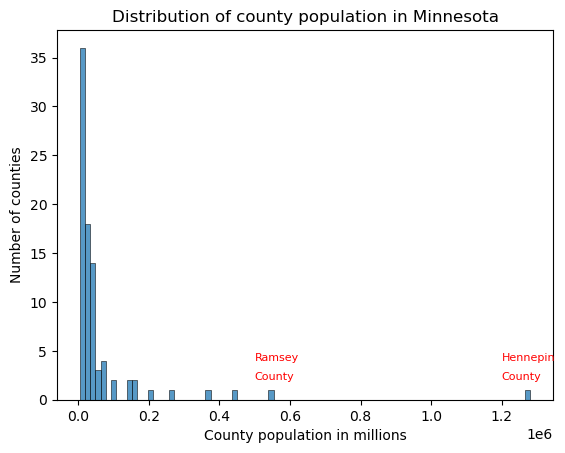

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram
sns.histplot(countycann_df["Population"])
plt.xlabel("County population in millions")
plt.ylabel("Number of counties")
plt.title("Distribution of county population in Minnesota")
1281565
plt.text(1200000, 2, "County", fontsize=8, color='red')
plt.text(1200000, 4, "Hennepin", fontsize=8, color='red')
plt.text(500000, 2, "County", fontsize=8, color='red')
plt.text(500000, 4, "Ramsey", fontsize=8, color='red')

Text(400, 4, 'Ramsey')

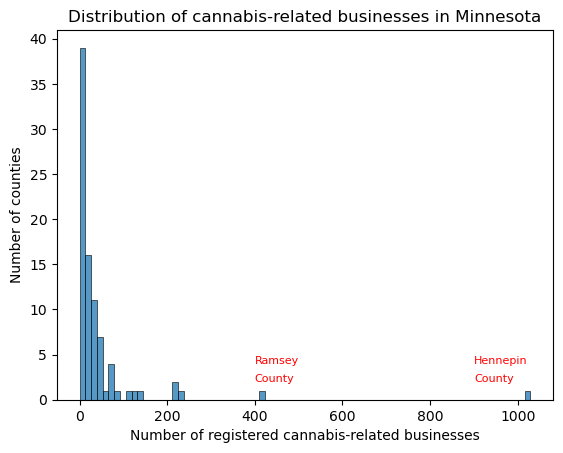

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram
sns.histplot(countycann_df["Total_CannBus"])
plt.xlabel("Number of registered cannabis-related businesses")
plt.ylabel("Number of counties")
plt.title("Distribution of cannabis-related businesses in Minnesota")
plt.text(900, 2, "County", fontsize=8, color='red')
plt.text(900, 4, "Hennepin", fontsize=8, color='red')
plt.text(400, 2, "County", fontsize=8, color='red')
plt.text(400, 4, "Ramsey", fontsize=8, color='red')

In [177]:
# Standardize by population
#Sales_Tax, Businesses, Total_crimes, Marijuana_DrugArrests, Total_DrugArrests, Total_CannBus

countycann_df["Sales_Tax_std"] = countycann_df["Sales_Tax"] / countycann_df["Population"]
countycann_df["Businesses_std"] = countycann_df["Businesses"] / countycann_df["Population"]
countycann_df["Total_crimes_std"] = countycann_df["Total_crimes"] / countycann_df["Population"]
countycann_df["Marijuana_DrugArrests_std"] = countycann_df["Marijuana_DrugArrests"] / countycann_df["Population"]
countycann_df["Total_DrugArrests_std"] = countycann_df["Total_DrugArrests"] / countycann_df["Population"]
countycann_df["Total_CannBus_std"] = countycann_df["Total_CannBus"] / countycann_df["Population"]

df_sorted = countycann_df.sort_values(by='Total_CannBus_std')
df_sorted

,County,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus,Sales_Tax_std,Businesses_std,Total_crimes_std,Marijuana_DrugArrests_std,Total_DrugArrests_std,Total_CannBus_std
76,Traverse,3360.0,1439.0,0.083929,1.436739e+06,128.0,48.0,22.0,45.0,0.0,427.600893,0.038095,0.014286,0.006548,0.013393,0.000000
82,Wilkin,6506.0,2735.0,0.097295,1.301824e+06,138.0,56.0,36.0,108.0,1.0,200.095911,0.021211,0.008607,0.005533,0.016600,0.000154
50,Murray,8179.0,3581.0,0.069935,3.283575e+06,301.0,27.0,13.0,91.0,3.0,401.464115,0.036802,0.003301,0.001589,0.011126,0.000367
5,Big Stone,5166.0,2224.0,0.115370,1.870009e+06,200.0,60.0,11.0,14.0,2.0,361.983933,0.038715,0.011614,0.002129,0.002710,0.000387
44,Martin,20025.0,8748.0,0.126042,1.240133e+07,622.0,187.0,10.0,179.0,8.0,619.292385,0.031061,0.009338,0.000499,0.008939,0.000400
74,Swift,9838.0,4064.0,0.105103,5.271690e+06,300.0,41.0,41.0,81.0,4.0,535.849766,0.030494,0.004168,0.004168,0.008233,0.000407
58,Pipestone,9424.0,3948.0,0.098154,4.549692e+06,299.0,45.0,17.0,25.0,4.0,482.777165,0.031728,0.004775,0.001804,0.002653,0.000424
21,Faribault,13921.0,6086.0,0.104375,5.534870e+06,436.0,49.0,5.0,21.0,6.0,397.591409,0.031320,0.003520,0.000359,0.001509,0.000431
60,Pope,11308.0,4862.0,0.080916,5.681456e+06,354.0,82.0,2.0,11.0,5.0,502.428016,0.031305,0.007252,0.000177,0.000973,0.000442
68,Scott,150928.0,52645.0,0.051018,1.022730e+08,3093.0,2559.0,8.0,17.0,67.0,677.628041,0.020493,0.016955,0.000053,0.000113,0.000444


Text(0.0045, 3, 'Cook')

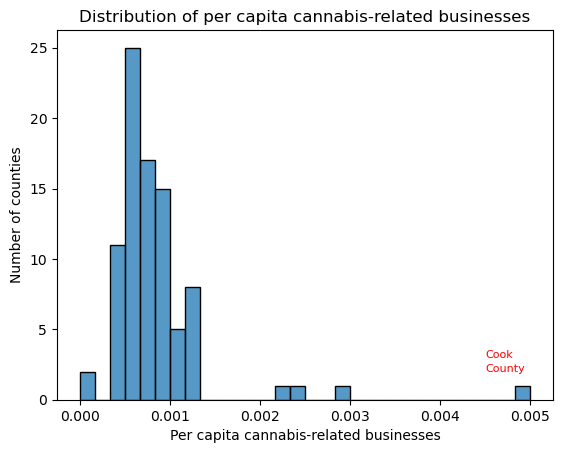

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram
sns.histplot(countycann_df["Total_CannBus_std"])
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Number of counties")
plt.title("Distribution of per capita cannabis-related businesses")
plt.text(0.0045, 2, "County", fontsize=8, color='red')
plt.text(0.0045, 3, "Cook", fontsize=8, color='red')
#plt.text(400, 2, "County", fontsize=8, color='red')
#plt.text(400, 4, "Ramsey", fontsize=8, color='red')

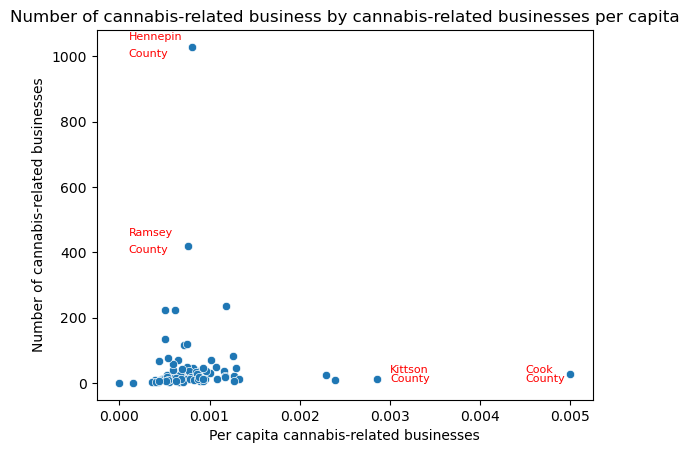

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Total_CannBus", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Number of cannabis-related businesses")
plt.title("Number of cannabis-related business by cannabis-related businesses per capita")

plt.text(0.0045, 2, "County", fontsize=8, color='red')
plt.text(0.0045, 30, "Cook", fontsize=8, color='red')
plt.text(0.003, 2, "County", fontsize=8, color='red')
plt.text(0.003, 30, "Kittson", fontsize=8, color='red')
plt.text(0.0001, 1000, "County", fontsize=8, color='red')
plt.text(0.0001, 1050, "Hennepin", fontsize=8, color='red')
plt.text(0.0001, 400, "County", fontsize=8, color='red')
plt.text(0.0001, 450, "Ramsey", fontsize=8, color='red')

#plt.text(400, 2, "County", fontsize=8, color='red')
#plt.text(400, 4, "Ramsey", fontsize=8, color='red')


# Show the plot
plt.show()

In [180]:
countycann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   County                     87 non-null     object 
 1   Population                 87 non-null     float64
 2   Households                 87 non-null     float64
 3   Poverty_Perc               87 non-null     float64
 4   Sales_Tax                  87 non-null     float64
 5   Businesses                 87 non-null     float64
 6   Total_crimes               86 non-null     float64
 7   Marijuana_DrugArrests      87 non-null     float64
 8   Total_DrugArrests          87 non-null     float64
 9   Total_CannBus              87 non-null     float64
 10  Sales_Tax_std              87 non-null     float64
 11  Businesses_std             87 non-null     float64
 12  Total_crimes_std           86 non-null     float64
 13  Marijuana_DrugArrests_std  87 non-null     float64
 

In [181]:
import scipy.stats as stats

x=countycann_df['Total_CannBus_std']
y=countycann_df['Poverty_Perc']

correlation, p_value = stats.spearmanr(x,y)

print("Spearman's correlation between Cannabis Businesses and Poverty:", correlation)
print("P-value:", p_value)

x=countycann_df['Total_CannBus_std']
y=countycann_df['Sales_Tax_std']

correlation, p_value = stats.spearmanr(x,y)

print("Spearman's correlation between Cannabis Businesses and Sales Tax:", correlation)
print("P-value:", p_value)

x=countycann_df['Total_CannBus_std']
y=countycann_df['Businesses_std']

correlation, p_value = stats.spearmanr(x,y)

print("Spearman's correlation between Cannabis Businesses and Total Number of Businesses:", correlation)
print("P-value:", p_value)

x=countycann_df['Total_CannBus_std']
y=countycann_df['Marijuana_DrugArrests_std']

correlation, p_value = stats.spearmanr(x,y)

print("Spearman's correlation between Cannabis Businesses and Marijuana Drug Arrests:", correlation)
print("P-value:", p_value)

x=countycann_df['Total_CannBus_std']
y=countycann_df['Total_DrugArrests_std']

correlation, p_value = stats.spearmanr(x,y)

print("Spearman's correlation between Cannabis Businesses and Total Drug Arrests:", correlation)
print("P-value:", p_value)

x=countycann_df['Total_CannBus_std']
y=countycann_df['Total_crimes_std']

correlation, p_value = stats.spearmanr(x,y, nan_policy='omit')

print("Spearman's correlation between Cannabis Businesses and Total Serious Crimes", correlation)
print("P-value:", p_value)


Spearman's correlation between Cannabis Businesses and Poverty: 0.19127724721148934
P-value: 0.0759414860672707
Spearman's correlation between Cannabis Businesses and Sales Tax: 0.09535612743311218
P-value: 0.3796384538360995
Spearman's correlation between Cannabis Businesses and Total Number of Businesses: 0.09499161624261863
P-value: 0.3814711210993683
Spearman's correlation between Cannabis Businesses and Marijuana Drug Arrests: 0.052235405625895674
P-value: 0.630871421671138
Spearman's correlation between Cannabis Businesses and Total Drug Arrests: 0.06090981993147188
P-value: 0.5751844780303492
Spearman's correlation between Cannabis Businesses and Total Serious Crimes 0.030425963488843813
P-value: 0.7809399550217042


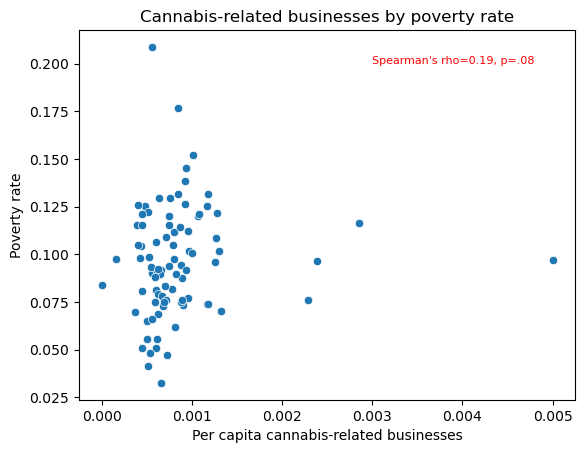

In [182]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.
# Scatter graph of Total_CannBus_std by Poverty_Perc
# Scatter graph of Total_Cannbus_std by Sales_Tax_std
# Scatter graph of Total_Cannbus_std by Total_DrugArrests_std
# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Poverty_Perc", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Poverty rate")
plt.title("Cannabis-related businesses by poverty rate")
plt.text(0.003, 0.2, "Spearman's rho=0.19, p=.08", fontsize=8, color='red')
# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Poverty: 0.19127724721148934
#P-value: 0.0759414860672707



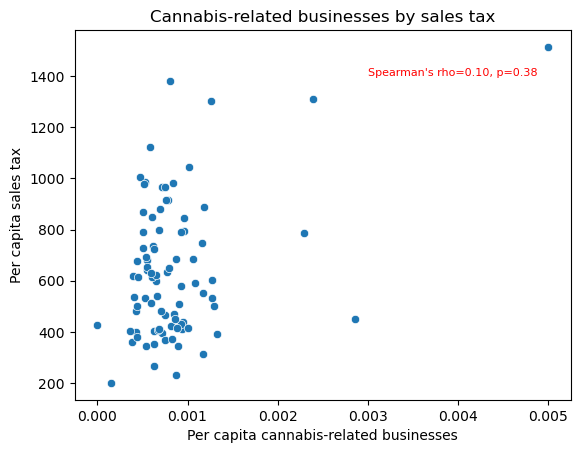

In [183]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.
# Scatter graph of Total_Cannbus_std by Sales_Tax_std
# Scatter graph of Total_Cannbus_std by Total_DrugArrests_std
# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Sales_Tax_std", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Per capita sales tax")
plt.title("Cannabis-related businesses by sales tax")
plt.text(.003, 1400, "Spearman's rho=0.10, p=0.38", fontsize=8, color='red')
# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Sales Tax: 0.09535612743311218
#P-value: 0.3796384538360995



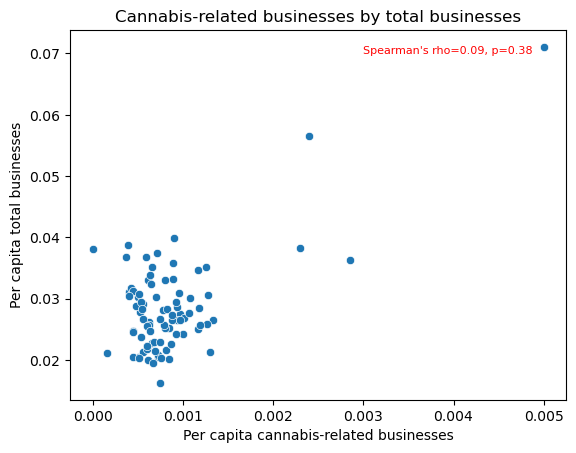

In [184]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.
# Scatter graph of Total_Cannbus_std by Sales_Tax_std
# Scatter graph of Total_Cannbus_std by Total_DrugArrests_std
# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Businesses_std", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Per capita total businesses")
plt.title("Cannabis-related businesses by total businesses")
plt.text(.003, .07, "Spearman's rho=0.09, p=0.38", fontsize=8, color='red')

# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Total Number of Businesses: 0.09499161624261863
#P-value: 0.3814711210993683



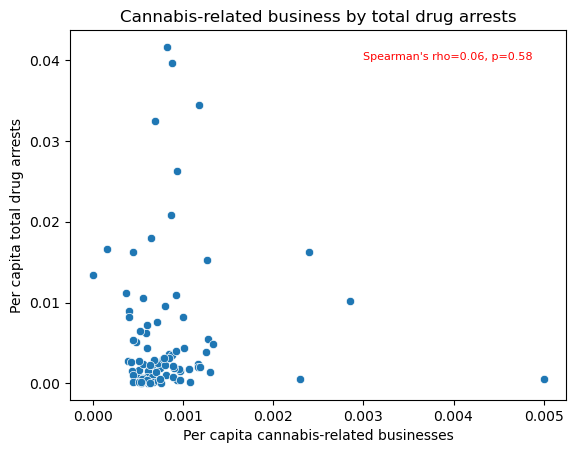

In [185]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.
# Scatter graph of Total_Cannbus_std by Sales_Tax_std
# Scatter graph of Total_Cannbus_std by Total_DrugArrests_std
# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Total_DrugArrests_std", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Per capita total drug arrests")
plt.title("Cannabis-related business by total drug arrests")
plt.text(.003, .04, "Spearman's rho=0.06, p=0.58", fontsize=8, color='red')

# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Total Drug Arrests: 0.06090981993147188
#P-value: 0.5751844780303492



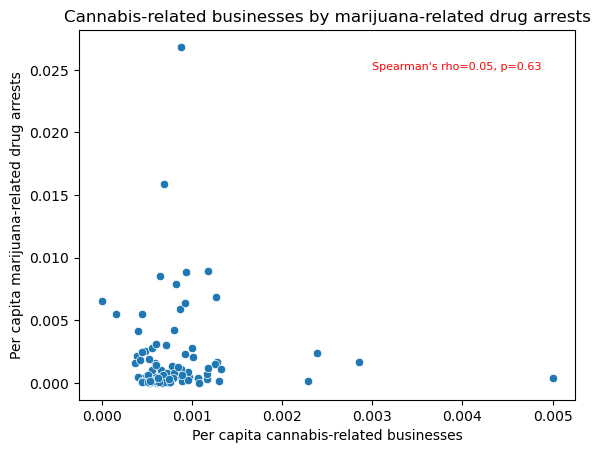

In [186]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.

# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Marijuana_DrugArrests_std", data=countycann_df)
plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Per capita marijuana-related drug arrests")
plt.title("Cannabis-related businesses by marijuana-related drug arrests")
plt.text (0.003, 0.025, "Spearman's rho=0.05, p=0.63", fontsize=8, color='red')
# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Marijuana Drug Arrests: 0.052235405625895674
#P-value: 0.630871421671138


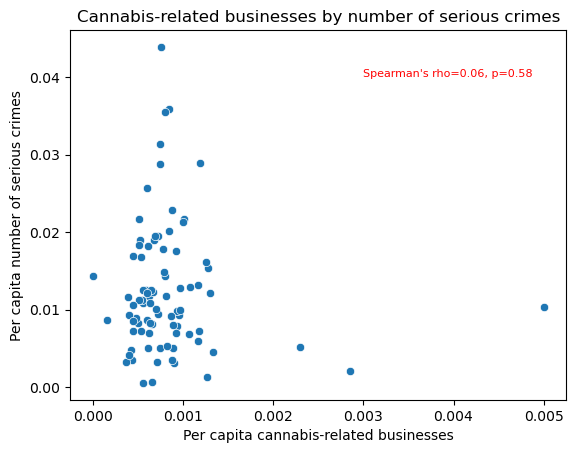

In [187]:
# Let's see whether there is any relationship between social and/or economic indicators and cannabis business development.
# To control for the effect of population size, we will use per capita rates.

# Scatter graph of Total_CannBus_std by Total_crimes_std

# import seaborn as sns
import matplotlib.pyplot as plt

data2=countycann_df[countycann_df['County'] !='Cook']

# Create a scatter plot
sns.scatterplot(x="Total_CannBus_std", y="Total_crimes_std", data=countycann_df)

plt.xlabel("Per capita cannabis-related businesses")
plt.ylabel("Per capita number of serious crimes")
plt.title("Cannabis-related businesses by number of serious crimes")
plt.text(0.003, 0.04, "Spearman's rho=0.06, p=0.58", fontsize=8, color='red')

# Show the plot
plt.show()

#Spearman's correlation between Cannabis Businesses and Total Serious Crimes 0.030425963488843813
#P-value: 0.7809399550217042



In [188]:
# In preparation for merging this data with a geojson file, we need to make sure the key variables are named the same.                                                       
countycann_df['COUNTY_NAM'] = countycann_df['County'].replace({'1-2': 'Saint Louis', 'Lac qui Parle': 'Lac Qui Parle'})

countycann_df

,County,Population,Households,Poverty_Perc,Sales_Tax,Businesses,Total_crimes,Marijuana_DrugArrests,Total_DrugArrests,Total_CannBus,Sales_Tax_std,Businesses_std,Total_crimes_std,Marijuana_DrugArrests_std,Total_DrugArrests_std,Total_CannBus_std,COUNTY_NAM
0,Aitkin,15697.0,7199.0,0.121807,9.470509e+06,481.0,242.0,26.0,86.0,20.0,603.332420,0.030643,0.015417,0.001656,0.005479,0.001274,Aitkin
1,Anoka,363887.0,133879.0,0.055704,2.679426e+08,7297.0,6642.0,162.0,543.0,223.0,736.334623,0.020053,0.018253,0.000445,0.001492,0.000613,Anoka
2,Becker,35183.0,14371.0,0.101981,2.797284e+07,967.0,451.0,17.0,53.0,34.0,795.067021,0.027485,0.012819,0.000483,0.001506,0.000966,Becker
3,Beltrami,46228.0,17678.0,0.176668,4.538813e+07,1169.0,1659.0,33.0,165.0,39.0,981.832050,0.025288,0.035887,0.000714,0.003569,0.000844,Beltrami
4,Benton,41379.0,16479.0,0.081128,3.508344e+07,924.0,510.0,18.0,33.0,25.0,847.856183,0.022330,0.012325,0.000435,0.000798,0.000604,Benton
5,Big Stone,5166.0,2224.0,0.115370,1.870009e+06,200.0,60.0,11.0,14.0,2.0,361.983933,0.038715,0.011614,0.002129,0.002710,0.000387,Big Stone
6,Blue Earth,69112.0,27193.0,0.152072,7.209664e+07,1855.0,1501.0,144.0,299.0,70.0,1043.185496,0.026840,0.021718,0.002084,0.004326,0.001013,Blue Earth
7,Brown,25912.0,10970.0,0.065105,2.049685e+07,783.0,216.0,14.0,29.0,13.0,791.017791,0.030218,0.008336,0.000540,0.001119,0.000502,Brown
8,Carlton,36207.0,13789.0,0.101555,1.807917e+07,770.0,442.0,7.0,50.0,47.0,499.327975,0.021267,0.012208,0.000193,0.001381,0.001298,Carlton
9,Carver,106922.0,38863.0,0.032510,6.401514e+07,2428.0,875.0,112.0,246.0,70.0,598.708760,0.022708,0.008184,0.001047,0.002301,0.000655,Carver


In [189]:
countycann_df.to_csv('countycann.csv', index=False)